In [1]:
# Import dependencies 
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import cpi

# sklearn is the Scikit-learn machine learning library for Python. 
# It has many modules, including one for linear regression, which we use here as our model
# We will use linear regression since we are trying to predict an outcome (i.e. salary) based on an input(s) (i.e. points)
from sklearn.linear_model import LinearRegression 

In [2]:
# Import our final data file
df = pd.read_csv(Path('Resources/playerDataFinal.csv'))
# View the dataframe
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (54,58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (54,58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,playerid,year,playername,position,age,teamabb,games,gamestarted,mp,per,...,seasonend,teamabbrevated,fullteam,seasonyear,team,record,wins,losses,win_percentage,teamshort
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25278,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,2018.0,CHA,Charlotte Hornets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25279,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,2018.0,NJN,Brooklyn Nets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25280,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,2018.0,LAL,Los Angeles Lakers,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25281,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,2018.0,CHI,Chicago Bulls,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,playerid,year,playername,position,age,teamabb,games,gamestarted,mp,per,...,seasonend,teamabbrevated,fullteam,seasonyear,team,record,wins,losses,win_percentage,teamshort
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25278,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,2018.0,CHA,Charlotte Hornets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25279,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,2018.0,NJN,Brooklyn Nets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25280,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,2018.0,LAL,Los Angeles Lakers,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25281,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,2018.0,CHI,Chicago Bulls,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# View columns in Dataframe
df.columns

Index(['playerid', 'year', 'playername', 'position', 'age', 'teamabb', 'games',
       'gamestarted', 'mp', 'per', 'ts_percentage', 'threepar', 'ftr',
       'orb_percentage', 'drb_percentage', 'trb_percentage', 'ast_percentage',
       'stl_percentage', 'blk_percentage', 'tov_percentage', 'usg_percentage',
       'blank1', 'ows', 'dws', 'ws', 'wsper48', 'blank2', 'obpm', 'dbpm',
       'bpm', 'vorp', 'fg', 'fga', 'fg_percentage', 'threep', 'threepa',
       'threep_percentage', 'twop', 'twopa', 'twop_percentage',
       'efg_percentage', 'ft', 'fta', 'ft_percentage', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'salaryid', 'salaryname',
       'salary', 'seasonstart', 'seasonend', 'teamabbrevated', 'fullteam',
       'seasonyear', 'team', 'record', 'wins', 'losses', 'win_percentage',
       'teamshort'],
      dtype='object')

Index(['playerid', 'year', 'playername', 'position', 'age', 'teamabb', 'games',
       'gamestarted', 'mp', 'per', 'ts_percentage', 'threepar', 'ftr',
       'orb_percentage', 'drb_percentage', 'trb_percentage', 'ast_percentage',
       'stl_percentage', 'blk_percentage', 'tov_percentage', 'usg_percentage',
       'blank1', 'ows', 'dws', 'ws', 'wsper48', 'blank2', 'obpm', 'dbpm',
       'bpm', 'vorp', 'fg', 'fga', 'fg_percentage', 'threep', 'threepa',
       'threep_percentage', 'twop', 'twopa', 'twop_percentage',
       'efg_percentage', 'ft', 'fta', 'ft_percentage', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'salaryid', 'salaryname',
       'salary', 'seasonstart', 'seasonend', 'teamabbrevated', 'fullteam',
       'seasonyear', 'team', 'record', 'wins', 'losses', 'win_percentage',
       'teamshort'],
      dtype='object')

In [4]:
# Filter df to include columns we want, and dropping the ones we don't need  
filtered_df = df[[
    'playerid', 'year', 'playername', 'position', 'age', 'teamabb', 'games',
       'gamestarted', 'mp', 'per', 'ts_percentage', 'threepar', 'ftr',
       'ows', 'dws', 'ws', 'fg', 'fga', 'fg_percentage', 'threep', 'threepa',
       'threep_percentage', 'twop', 'twopa', 'twop_percentage',
       'efg_percentage', 'ft', 'fta', 'ft_percentage', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'salaryid', 'salaryname',
       'salary', 'seasonstart', 'seasonend', 'teamabbrevated', 'fullteam',
       'seasonyear', 'team', 'record', 'wins', 'losses', 'win_percentage',
       'teamshort'
]]

filtered_df

,playerid,year,playername,position,age,teamabb,games,gamestarted,mp,per,...,seasonend,teamabbrevated,fullteam,seasonyear,team,record,wins,losses,win_percentage,teamshort
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25278,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,2018.0,CHA,Charlotte Hornets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25279,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,2018.0,NJN,Brooklyn Nets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25280,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,2018.0,LAL,Los Angeles Lakers,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25281,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,2018.0,CHI,Chicago Bulls,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,playerid,year,playername,position,age,teamabb,games,gamestarted,mp,per,...,seasonend,teamabbrevated,fullteam,seasonyear,team,record,wins,losses,win_percentage,teamshort
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25278,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,2018.0,CHA,Charlotte Hornets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25279,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,2018.0,NJN,Brooklyn Nets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25280,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,2018.0,LAL,Los Angeles Lakers,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25281,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,2018.0,CHI,Chicago Bulls,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Drop values where the year is below 1990 because there wouldn't be salary data for that, and that is our target variable
dropped_df = filtered_df[filtered_df['year'] >= 1990]
dropped_df

,playerid,year,playername,position,age,teamabb,games,gamestarted,mp,per,...,seasonend,teamabbrevated,fullteam,seasonyear,team,record,wins,losses,win_percentage,teamshort
5370,22272,2014.0,Lou Amundson,PF,31.0,CHI,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,2014.0,Bulls,50-32,50.0,32.0,0.610,CHI
9548,9547,1990.0,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,...,1991.0,ORL,Orlando Magic,1990.0,Magic,31-51,31.0,51.0,0.378,ORL
9549,9548,1990.0,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,15.4,...,1991.0,DEN,Denver Nuggets,1990.0,Nuggets,20-62,20.0,62.0,0.244,DEN
9550,9549,1990.0,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,15.8,...,1991.0,DET,Detroit Pistons,1990.0,Pistons,50-32,50.0,32.0,0.610,DET
9551,9550,1990.0,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,16.1,...,1991.0,POR,Portland Trail Blazers,1990.0,Kings,25-57,25.0,57.0,0.305,SAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25278,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,2018.0,CHA,Charlotte Hornets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25279,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,2018.0,NJN,Brooklyn Nets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25280,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,2018.0,LAL,Los Angeles Lakers,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25281,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,2018.0,CHI,Chicago Bulls,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,playerid,year,playername,position,age,teamabb,games,gamestarted,mp,per,...,seasonend,teamabbrevated,fullteam,seasonyear,team,record,wins,losses,win_percentage,teamshort
5370,22272,2014.0,Lou Amundson,PF,31.0,CHI,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,2014.0,Bulls,50-32,50.0,32.0,0.610,CHI
9548,9547,1990.0,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,...,1991.0,ORL,Orlando Magic,1990.0,Magic,31-51,31.0,51.0,0.378,ORL
9549,9548,1990.0,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,15.4,...,1991.0,DEN,Denver Nuggets,1990.0,Nuggets,20-62,20.0,62.0,0.244,DEN
9550,9549,1990.0,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,15.8,...,1991.0,DET,Detroit Pistons,1990.0,Pistons,50-32,50.0,32.0,0.610,DET
9551,9550,1990.0,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,16.1,...,1991.0,POR,Portland Trail Blazers,1990.0,Kings,25-57,25.0,57.0,0.305,SAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25278,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,2018.0,CHA,Charlotte Hornets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25279,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,2018.0,NJN,Brooklyn Nets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25280,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,2018.0,LAL,Los Angeles Lakers,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25281,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,2018.0,CHI,Chicago Bulls,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Group the dataframe by playername and year 
# there are instances where the player could have played for multiple teams in a year 
# we need to sum the player stats for that year since the player stats are recorded across the multiple teams 
# there are columns however, that would need to be averaged such as their salary since the salary is reported annually and stays the same across the multiple teams
# we have tried passing specific columns to the .sum function but it still sums every column so we will not pass columns to the function

sum_grouped_df = pd.DataFrame(dropped_df.groupby(["playername","year"]).sum())

# Drop the index from the above dataframe so that we still retain the player name as a column
sum_grouped_df = sum_grouped_df.reset_index(drop=False, inplace=False)

# We need a common id to join the values across the tables so we will create one by joining the year and player name 
sum_grouped_df['yearconverted'] = sum_grouped_df['year'].astype(str)
sum_grouped_df['joiner'] = sum_grouped_df['playername'] + sum_grouped_df['yearconverted']

# view the sum grouped dataframe
sum_grouped_df

,playername,year,playerid,age,games,gamestarted,mp,per,ts_percentage,threepar,...,salaryid,salary,seasonstart,seasonend,seasonyear,wins,losses,win_percentage,yearconverted,joiner
0,A.C. Green,1990.0,9688,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707,1990.0,A.C. Green1990.0
1,A.C. Green,1991.0,10166,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524,1991.0,A.C. Green1991.0
2,A.C. Green,1992.0,10617,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476,1992.0,A.C. Green1992.0
3,A.C. Green,1993.0,11060,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402,1993.0,A.C. Green1993.0
4,A.C. Green,1994.0,11529,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,1497.0,6472600.0,1994.0,1995.0,0.0,0.0,0.0,0.000,1994.0,A.C. Green1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,Zydrunas Ilgauskas,2007.0,18442,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549,2007.0,Zydrunas Ilgauskas2007.0
12334,Zydrunas Ilgauskas,2008.0,19003,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805,2008.0,Zydrunas Ilgauskas2008.0
12335,Zydrunas Ilgauskas,2009.0,19600,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744,2009.0,Zydrunas Ilgauskas2009.0
12336,Zydrunas Ilgauskas,2010.0,20187,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,0.0,0.0,0.0,0.0,2010.0,19.0,63.0,0.232,2010.0,Zydrunas Ilgauskas2010.0


,playername,year,playerid,age,games,gamestarted,mp,per,ts_percentage,threepar,...,salaryid,salary,seasonstart,seasonend,seasonyear,wins,losses,win_percentage,yearconverted,joiner
0,A.C. Green,1990.0,9688,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707,1990.0,A.C. Green1990.0
1,A.C. Green,1991.0,10166,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524,1991.0,A.C. Green1991.0
2,A.C. Green,1992.0,10617,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476,1992.0,A.C. Green1992.0
3,A.C. Green,1993.0,11060,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402,1993.0,A.C. Green1993.0
4,A.C. Green,1994.0,11529,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,1497.0,6472600.0,1994.0,1995.0,0.0,0.0,0.0,0.000,1994.0,A.C. Green1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,Zydrunas Ilgauskas,2007.0,18442,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549,2007.0,Zydrunas Ilgauskas2007.0
12334,Zydrunas Ilgauskas,2008.0,19003,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805,2008.0,Zydrunas Ilgauskas2008.0
12335,Zydrunas Ilgauskas,2009.0,19600,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744,2009.0,Zydrunas Ilgauskas2009.0
12336,Zydrunas Ilgauskas,2010.0,20187,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,0.0,0.0,0.0,0.0,2010.0,19.0,63.0,0.232,2010.0,Zydrunas Ilgauskas2010.0


In [7]:
# In order to get the average values, we will run the same function above but using "mean" instead of sum
# Again, regardless of passing columns to the function, it averages everything still so we won't pass columns
avg_grouped_df = pd.DataFrame(dropped_df.groupby(["playername","year"]).mean())

# Drop the index from the above dataframe so that we still retain the player name as a column
avg_grouped_df = avg_grouped_df.reset_index(drop=False, inplace=False)

# We need a common id to join the values across the tables so we will create one by joining the year and player name 
avg_grouped_df['yearconverted'] = avg_grouped_df['year'].astype(str)
avg_grouped_df['joiner'] = avg_grouped_df['playername'] + avg_grouped_df['yearconverted']

# view the average grouped dataframe
avg_grouped_df

,playername,year,playerid,age,games,gamestarted,mp,per,ts_percentage,threepar,...,salaryid,salary,seasonstart,seasonend,seasonyear,wins,losses,win_percentage,yearconverted,joiner
0,A.C. Green,1990.0,9688.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707,1990.0,A.C. Green1990.0
1,A.C. Green,1991.0,10166.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524,1991.0,A.C. Green1991.0
2,A.C. Green,1992.0,10617.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476,1992.0,A.C. Green1992.0
3,A.C. Green,1993.0,11060.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402,1993.0,A.C. Green1993.0
4,A.C. Green,1994.0,11529.0,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,1497.0,6472600.0,1994.0,1995.0,NaN,NaN,NaN,NaN,1994.0,A.C. Green1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,Zydrunas Ilgauskas,2007.0,18442.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549,2007.0,Zydrunas Ilgauskas2007.0
12334,Zydrunas Ilgauskas,2008.0,19003.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805,2008.0,Zydrunas Ilgauskas2008.0
12335,Zydrunas Ilgauskas,2009.0,19600.0,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744,2009.0,Zydrunas Ilgauskas2009.0
12336,Zydrunas Ilgauskas,2010.0,20187.0,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,NaN,NaN,NaN,NaN,2010.0,19.0,63.0,0.232,2010.0,Zydrunas Ilgauskas2010.0


,playername,year,playerid,age,games,gamestarted,mp,per,ts_percentage,threepar,...,salaryid,salary,seasonstart,seasonend,seasonyear,wins,losses,win_percentage,yearconverted,joiner
0,A.C. Green,1990.0,9688.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707,1990.0,A.C. Green1990.0
1,A.C. Green,1991.0,10166.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524,1991.0,A.C. Green1991.0
2,A.C. Green,1992.0,10617.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476,1992.0,A.C. Green1992.0
3,A.C. Green,1993.0,11060.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402,1993.0,A.C. Green1993.0
4,A.C. Green,1994.0,11529.0,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,1497.0,6472600.0,1994.0,1995.0,NaN,NaN,NaN,NaN,1994.0,A.C. Green1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,Zydrunas Ilgauskas,2007.0,18442.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549,2007.0,Zydrunas Ilgauskas2007.0
12334,Zydrunas Ilgauskas,2008.0,19003.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805,2008.0,Zydrunas Ilgauskas2008.0
12335,Zydrunas Ilgauskas,2009.0,19600.0,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744,2009.0,Zydrunas Ilgauskas2009.0
12336,Zydrunas Ilgauskas,2010.0,20187.0,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,NaN,NaN,NaN,NaN,2010.0,19.0,63.0,0.232,2010.0,Zydrunas Ilgauskas2010.0


In [8]:
# View columns in the new dataframes 
sum_grouped_df.dtypes

playername            object
year                 float64
playerid               int64
age                  float64
games                float64
gamestarted          float64
mp                   float64
per                  float64
ts_percentage        float64
threepar             float64
ftr                  float64
ows                  float64
dws                  float64
ws                   float64
fg                   float64
fga                  float64
fg_percentage        float64
threep               float64
threepa              float64
threep_percentage    float64
twop                 float64
twopa                float64
twop_percentage      float64
efg_percentage       float64
ft                   float64
fta                  float64
ft_percentage        float64
orb                  float64
drb                  float64
trb                  float64
ast                  float64
stl                  float64
blk                  float64
tov                  float64
pf            

playername            object
year                 float64
playerid               int64
age                  float64
games                float64
gamestarted          float64
mp                   float64
per                  float64
ts_percentage        float64
threepar             float64
ftr                  float64
ows                  float64
dws                  float64
ws                   float64
fg                   float64
fga                  float64
fg_percentage        float64
threep               float64
threepa              float64
threep_percentage    float64
twop                 float64
twopa                float64
twop_percentage      float64
efg_percentage       float64
ft                   float64
fta                  float64
ft_percentage        float64
orb                  float64
drb                  float64
trb                  float64
ast                  float64
stl                  float64
blk                  float64
tov                  float64
pf            

In [9]:
# View columns in the new dataframes 
avg_grouped_df.dtypes

playername            object
year                 float64
playerid             float64
age                  float64
games                float64
gamestarted          float64
mp                   float64
per                  float64
ts_percentage        float64
threepar             float64
ftr                  float64
ows                  float64
dws                  float64
ws                   float64
fg                   float64
fga                  float64
fg_percentage        float64
threep               float64
threepa              float64
threep_percentage    float64
twop                 float64
twopa                float64
twop_percentage      float64
efg_percentage       float64
ft                   float64
fta                  float64
ft_percentage        float64
orb                  float64
drb                  float64
trb                  float64
ast                  float64
stl                  float64
blk                  float64
tov                  float64
pf            

playername            object
year                 float64
playerid             float64
age                  float64
games                float64
gamestarted          float64
mp                   float64
per                  float64
ts_percentage        float64
threepar             float64
ftr                  float64
ows                  float64
dws                  float64
ws                   float64
fg                   float64
fga                  float64
fg_percentage        float64
threep               float64
threepa              float64
threep_percentage    float64
twop                 float64
twopa                float64
twop_percentage      float64
efg_percentage       float64
ft                   float64
fta                  float64
ft_percentage        float64
orb                  float64
drb                  float64
trb                  float64
ast                  float64
stl                  float64
blk                  float64
tov                  float64
pf            

In [10]:
# To test our data using a value/player we know has player for multiple teams in a year 
# we can see that certain columns (i.e. seasonstart and seasonend) they have beben summed when we need an average 
testSumDF = sum_grouped_df.loc[sum_grouped_df["playername"] == "Yogi Ferrell"]
testSumDF

,playername,year,playerid,age,games,gamestarted,mp,per,ts_percentage,threepar,...,salaryid,salary,seasonstart,seasonend,seasonyear,wins,losses,win_percentage,yearconverted,joiner
12264,Yogi Ferrell,2017.0,72780,69.0,92.0,58.0,2394.0,33.7,1.556,1.43,...,35496.0,3937833.0,6051.0,6054.0,0.0,0.0,0.0,0.0,2017.0,Yogi Ferrell2017.0


,playername,year,playerid,age,games,gamestarted,mp,per,ts_percentage,threepar,...,salaryid,salary,seasonstart,seasonend,seasonyear,wins,losses,win_percentage,yearconverted,joiner
12264,Yogi Ferrell,2017.0,72780,69.0,92.0,58.0,2394.0,33.7,1.556,1.43,...,35496.0,3937833.0,6051.0,6054.0,0.0,0.0,0.0,0.0,2017.0,Yogi Ferrell2017.0


In [11]:
# To test our data using a value/player we know has player for multiple teams in a year 
# we can now see that we have the same columns as averages 
testAvgDF = avg_grouped_df.loc[avg_grouped_df["playername"] == "Yogi Ferrell"]
testAvgDF

,playername,year,playerid,age,games,gamestarted,mp,per,ts_percentage,threepar,...,salaryid,salary,seasonstart,seasonend,seasonyear,wins,losses,win_percentage,yearconverted,joiner
12264,Yogi Ferrell,2017.0,24260.0,23.0,30.666667,19.333333,798.0,11.233333,0.518667,0.476667,...,11832.0,1312611.0,2017.0,2018.0,NaN,NaN,NaN,NaN,2017.0,Yogi Ferrell2017.0


,playername,year,playerid,age,games,gamestarted,mp,per,ts_percentage,threepar,...,salaryid,salary,seasonstart,seasonend,seasonyear,wins,losses,win_percentage,yearconverted,joiner
12264,Yogi Ferrell,2017.0,24260.0,23.0,30.666667,19.333333,798.0,11.233333,0.518667,0.476667,...,11832.0,1312611.0,2017.0,2018.0,NaN,NaN,NaN,NaN,2017.0,Yogi Ferrell2017.0


In [12]:
# Join dataframe that holds averaged/summed values on the created 'joiner' column
combined_df = sum_grouped_df.merge(avg_grouped_df, how='inner', on='joiner',left_index=False, right_index=False, sort=False, suffixes=('sum', 'avg'), copy=True, indicator=False, validate='one_to_one')
combined_df 

,playernamesum,yearsum,playeridsum,agesum,gamessum,gamestartedsum,mpsum,persum,ts_percentagesum,threeparsum,...,ptsavg,salaryidavg,salaryavg,seasonstartavg,seasonendavg,seasonyearavg,winsavg,lossesavg,win_percentageavg,yearconvertedavg
0,A.C. Green,1990.0,9688,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,1061.0,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707,1990.0
1,A.C. Green,1991.0,10166,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,750.0,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524,1991.0
2,A.C. Green,1992.0,10617,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,1116.0,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476,1992.0
3,A.C. Green,1993.0,11060,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,1051.0,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402,1993.0
4,A.C. Green,1994.0,11529,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,1204.0,1497.0,6472600.0,1994.0,1995.0,NaN,NaN,NaN,NaN,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,Zydrunas Ilgauskas,2007.0,18442,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,925.0,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549,2007.0
12334,Zydrunas Ilgauskas,2008.0,19003,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,1029.0,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805,2008.0
12335,Zydrunas Ilgauskas,2009.0,19600,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,838.0,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744,2009.0
12336,Zydrunas Ilgauskas,2010.0,20187,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,474.0,NaN,NaN,NaN,NaN,2010.0,19.0,63.0,0.232,2010.0


,playernamesum,yearsum,playeridsum,agesum,gamessum,gamestartedsum,mpsum,persum,ts_percentagesum,threeparsum,...,ptsavg,salaryidavg,salaryavg,seasonstartavg,seasonendavg,seasonyearavg,winsavg,lossesavg,win_percentageavg,yearconvertedavg
0,A.C. Green,1990.0,9688,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,1061.0,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707,1990.0
1,A.C. Green,1991.0,10166,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,750.0,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524,1991.0
2,A.C. Green,1992.0,10617,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,1116.0,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476,1992.0
3,A.C. Green,1993.0,11060,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,1051.0,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402,1993.0
4,A.C. Green,1994.0,11529,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,1204.0,1497.0,6472600.0,1994.0,1995.0,NaN,NaN,NaN,NaN,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,Zydrunas Ilgauskas,2007.0,18442,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,925.0,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549,2007.0
12334,Zydrunas Ilgauskas,2008.0,19003,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,1029.0,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805,2008.0
12335,Zydrunas Ilgauskas,2009.0,19600,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,838.0,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744,2009.0
12336,Zydrunas Ilgauskas,2010.0,20187,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,474.0,NaN,NaN,NaN,NaN,2010.0,19.0,63.0,0.232,2010.0


In [13]:
# View the columns in the combined_df
combined_df.columns

Index(['playernamesum', 'yearsum', 'playeridsum', 'agesum', 'gamessum',
       'gamestartedsum', 'mpsum', 'persum', 'ts_percentagesum', 'threeparsum',
       'ftrsum', 'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum',
       'fg_percentagesum', 'threepsum', 'threepasum', 'threep_percentagesum',
       'twopsum', 'twopasum', 'twop_percentagesum', 'efg_percentagesum',
       'ftsum', 'ftasum', 'ft_percentagesum', 'orbsum', 'drbsum', 'trbsum',
       'astsum', 'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum',
       'salaryidsum', 'salarysum', 'seasonstartsum', 'seasonendsum',
       'seasonyearsum', 'winssum', 'lossessum', 'win_percentagesum',
       'yearconvertedsum', 'joiner', 'playernameavg', 'yearavg', 'playeridavg',
       'ageavg', 'gamesavg', 'gamestartedavg', 'mpavg', 'peravg',
       'ts_percentageavg', 'threeparavg', 'ftravg', 'owsavg', 'dwsavg',
       'wsavg', 'fgavg', 'fgaavg', 'fg_percentageavg', 'threepavg',
       'threepaavg', 'threep_percentageavg', 'twopavg', 'twopaavg',

Index(['playernamesum', 'yearsum', 'playeridsum', 'agesum', 'gamessum',
       'gamestartedsum', 'mpsum', 'persum', 'ts_percentagesum', 'threeparsum',
       'ftrsum', 'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum',
       'fg_percentagesum', 'threepsum', 'threepasum', 'threep_percentagesum',
       'twopsum', 'twopasum', 'twop_percentagesum', 'efg_percentagesum',
       'ftsum', 'ftasum', 'ft_percentagesum', 'orbsum', 'drbsum', 'trbsum',
       'astsum', 'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum',
       'salaryidsum', 'salarysum', 'seasonstartsum', 'seasonendsum',
       'seasonyearsum', 'winssum', 'lossessum', 'win_percentagesum',
       'yearconvertedsum', 'joiner', 'playernameavg', 'yearavg', 'playeridavg',
       'ageavg', 'gamesavg', 'gamestartedavg', 'mpavg', 'peravg',
       'ts_percentageavg', 'threeparavg', 'ftravg', 'owsavg', 'dwsavg',
       'wsavg', 'fgavg', 'fgaavg', 'fg_percentageavg', 'threepavg',
       'threepaavg', 'threep_percentageavg', 'twopavg', 'twopaavg',

In [14]:
# View for the test player, we can now see that there are columns for the sum and average 
testCombinedDF = combined_df.loc[combined_df["playernamesum"] == "Yogi Ferrell"]
testCombinedDF

,playernamesum,yearsum,playeridsum,agesum,gamessum,gamestartedsum,mpsum,persum,ts_percentagesum,threeparsum,...,ptsavg,salaryidavg,salaryavg,seasonstartavg,seasonendavg,seasonyearavg,winsavg,lossesavg,win_percentageavg,yearconvertedavg
12264,Yogi Ferrell,2017.0,72780,69.0,92.0,58.0,2394.0,33.7,1.556,1.43,...,308.0,11832.0,1312611.0,2017.0,2018.0,NaN,NaN,NaN,NaN,2017.0


,playernamesum,yearsum,playeridsum,agesum,gamessum,gamestartedsum,mpsum,persum,ts_percentagesum,threeparsum,...,ptsavg,salaryidavg,salaryavg,seasonstartavg,seasonendavg,seasonyearavg,winsavg,lossesavg,win_percentageavg,yearconvertedavg
12264,Yogi Ferrell,2017.0,72780,69.0,92.0,58.0,2394.0,33.7,1.556,1.43,...,308.0,11832.0,1312611.0,2017.0,2018.0,NaN,NaN,NaN,NaN,2017.0


In [15]:
# Export the df to a csv to be able to view the data easier
# We can see that Yogi is now correctly showing both sum and avgs for our columns 
combined_df.to_csv('Resources/TestJoiner.csv')

In [16]:
# Create a new dataframe with the columns we want from the combined_df taking the sum/avg where it makes sense 
ML_df = combined_df[[
    'playeridavg', 'playernameavg', 'yearavg', 'ageavg', 'gamessum',
       'gamestartedsum', 'mpsum', 'peravg', 'ts_percentageavg', 'threeparavg', 'ftravg',
       'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum', 'fg_percentageavg', 'threepsum', 'threepasum',
       'threep_percentageavg', 'twopsum', 'twopasum', 'twop_percentageavg',
       'efg_percentageavg', 'ftsum', 'ftasum', 'ft_percentageavg', 'orbsum', 'drbsum', 'trbsum',
       'astsum', 'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum', 'salaryidavg',
       'salaryavg', 'seasonstartavg', 'seasonendavg',
       'seasonyearavg', 'winsavg', 'lossesavg', 'win_percentageavg'    
]]
# View the dataframe
ML_df

,playeridavg,playernameavg,yearavg,ageavg,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,...,pfsum,ptssum,salaryidavg,salaryavg,seasonstartavg,seasonendavg,seasonyearavg,winsavg,lossesavg,win_percentageavg
0,9688.0,A.C. Green,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,207.0,1061.0,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707
1,10166.0,A.C. Green,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,117.0,750.0,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524
2,10617.0,A.C. Green,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,141.0,1116.0,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476
3,11060.0,A.C. Green,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,149.0,1051.0,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402
4,11529.0,A.C. Green,1994.0,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,142.0,1204.0,1497.0,6472600.0,1994.0,1995.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,18442.0,Zydrunas Ilgauskas,2007.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,257.0,925.0,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549
12334,19003.0,Zydrunas Ilgauskas,2008.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,247.0,1029.0,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805
12335,19600.0,Zydrunas Ilgauskas,2009.0,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,183.0,838.0,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744
12336,20187.0,Zydrunas Ilgauskas,2010.0,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,183.0,474.0,NaN,NaN,NaN,NaN,2010.0,19.0,63.0,0.232


,playeridavg,playernameavg,yearavg,ageavg,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,...,pfsum,ptssum,salaryidavg,salaryavg,seasonstartavg,seasonendavg,seasonyearavg,winsavg,lossesavg,win_percentageavg
0,9688.0,A.C. Green,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,207.0,1061.0,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707
1,10166.0,A.C. Green,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,117.0,750.0,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524
2,10617.0,A.C. Green,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,141.0,1116.0,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476
3,11060.0,A.C. Green,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,149.0,1051.0,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402
4,11529.0,A.C. Green,1994.0,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,142.0,1204.0,1497.0,6472600.0,1994.0,1995.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,18442.0,Zydrunas Ilgauskas,2007.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,257.0,925.0,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549
12334,19003.0,Zydrunas Ilgauskas,2008.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,247.0,1029.0,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805
12335,19600.0,Zydrunas Ilgauskas,2009.0,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,183.0,838.0,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744
12336,20187.0,Zydrunas Ilgauskas,2010.0,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,183.0,474.0,NaN,NaN,NaN,NaN,2010.0,19.0,63.0,0.232


In [17]:
# Export the df to a csv to be able to view the data easier
# We can see that Yogi is now correctly showing both sum and avgs for our columns 
ML_df.to_csv('Resources/MachineLearningCombinedData.csv')

In [18]:
# Making player id the index
ML_df = ML_df.set_index(['playeridavg'])
ML_df.head()
# Check the columns 
ML_df.columns

Index(['playernameavg', 'yearavg', 'ageavg', 'gamessum', 'gamestartedsum',
       'mpsum', 'peravg', 'ts_percentageavg', 'threeparavg', 'ftravg',
       'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum', 'fg_percentageavg',
       'threepsum', 'threepasum', 'threep_percentageavg', 'twopsum',
       'twopasum', 'twop_percentageavg', 'efg_percentageavg', 'ftsum',
       'ftasum', 'ft_percentageavg', 'orbsum', 'drbsum', 'trbsum', 'astsum',
       'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum', 'salaryidavg',
       'salaryavg', 'seasonstartavg', 'seasonendavg', 'seasonyearavg',
       'winsavg', 'lossesavg', 'win_percentageavg'],
      dtype='object')

Index(['playernameavg', 'yearavg', 'ageavg', 'gamessum', 'gamestartedsum',
       'mpsum', 'peravg', 'ts_percentageavg', 'threeparavg', 'ftravg',
       'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum', 'fg_percentageavg',
       'threepsum', 'threepasum', 'threep_percentageavg', 'twopsum',
       'twopasum', 'twop_percentageavg', 'efg_percentageavg', 'ftsum',
       'ftasum', 'ft_percentageavg', 'orbsum', 'drbsum', 'trbsum', 'astsum',
       'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum', 'salaryidavg',
       'salaryavg', 'seasonstartavg', 'seasonendavg', 'seasonyearavg',
       'winsavg', 'lossesavg', 'win_percentageavg'],
      dtype='object')

In [19]:
# Dropping rows where salary = 0.0
ML_df = ML_df.loc[(ML_df[['salaryavg']] != 0).all(axis=1)]
# View the dataframe
ML_df

,playernameavg,yearavg,ageavg,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,ftravg,...,pfsum,ptssum,salaryidavg,salaryavg,seasonstartavg,seasonendavg,seasonyearavg,winsavg,lossesavg,win_percentageavg
playeridavg,,,,,,,,,,,,,,,,,,,,,
9688.0,A.C. Green,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,0.459,...,207.0,1061.0,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707
10166.0,A.C. Green,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,0.557,...,117.0,750.0,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524
10617.0,A.C. Green,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,0.569,...,141.0,1116.0,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476
11060.0,A.C. Green,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,0.531,...,149.0,1051.0,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402
11529.0,A.C. Green,1994.0,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,0.391,...,142.0,1204.0,1497.0,6472600.0,1994.0,1995.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18442.0,Zydrunas Ilgauskas,2007.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,0.242,...,257.0,925.0,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549
19003.0,Zydrunas Ilgauskas,2008.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,0.276,...,247.0,1029.0,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805
19600.0,Zydrunas Ilgauskas,2009.0,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,0.240,...,183.0,838.0,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744


,playernameavg,yearavg,ageavg,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,ftravg,...,pfsum,ptssum,salaryidavg,salaryavg,seasonstartavg,seasonendavg,seasonyearavg,winsavg,lossesavg,win_percentageavg
playeridavg,,,,,,,,,,,,,,,,,,,,,
9688.0,A.C. Green,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,0.459,...,207.0,1061.0,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707
10166.0,A.C. Green,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,0.557,...,117.0,750.0,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524
10617.0,A.C. Green,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,0.569,...,141.0,1116.0,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476
11060.0,A.C. Green,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,0.531,...,149.0,1051.0,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402
11529.0,A.C. Green,1994.0,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,0.391,...,142.0,1204.0,1497.0,6472600.0,1994.0,1995.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18442.0,Zydrunas Ilgauskas,2007.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,0.242,...,257.0,925.0,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549
19003.0,Zydrunas Ilgauskas,2008.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,0.276,...,247.0,1029.0,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805
19600.0,Zydrunas Ilgauskas,2009.0,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,0.240,...,183.0,838.0,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744


In [20]:
# Attempt to adjust salary amount by year to account for inflation using Consumer Price Index library, then drop year column/original salary column
cpi.update()

In [21]:
# test accuracy against google search:
cpi.inflate(1000, 1975)

4810.613382899628

4810.613382899628

In [22]:
# test accuracy for data row:
cpi.inflate(11541074, 2009)

13922805.404261269

13922805.404261269

In [23]:
# Reset Player id to index number
ML_df.reset_index(inplace=True)

In [24]:
# Set year column to integer
ML_df['year'] = ML_df['yearavg'].astype(int)

In [25]:
# Apply cpi.inflate to adjust salaries to current $ value
ML_df['adjusted_salary'] = ML_df.apply(lambda x: cpi.inflate(x.salaryavg, int(x.yearavg)), axis=1).round(2)

In [26]:
# View dataframe 
ML_df

,playeridavg,playernameavg,yearavg,ageavg,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,...,salaryidavg,salaryavg,seasonstartavg,seasonendavg,seasonyearavg,winsavg,lossesavg,win_percentageavg,year,adjusted_salary
0,9688.0,A.C. Green,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707,1990,3465334.74
1,10166.0,A.C. Green,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524,1991,3325398.31
2,10617.0,A.C. Green,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476,1992,3228219.89
3,11060.0,A.C. Green,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402,1993,3376185.02
4,11529.0,A.C. Green,1994.0,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,1497.0,6472600.0,1994.0,1995.0,NaN,NaN,NaN,NaN,1994,11303509.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,18442.0,Zydrunas Ilgauskas,2007.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549,2007,12659767.61
12334,19003.0,Zydrunas Ilgauskas,2008.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805,2008,13032466.89
12335,19600.0,Zydrunas Ilgauskas,2009.0,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744,2009,13922805.40
12336,20187.0,Zydrunas Ilgauskas,2010.0,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,NaN,NaN,NaN,NaN,2010.0,19.0,63.0,0.232,2010,NaN


,playeridavg,playernameavg,yearavg,ageavg,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,...,salaryidavg,salaryavg,seasonstartavg,seasonendavg,seasonyearavg,winsavg,lossesavg,win_percentageavg,year,adjusted_salary
0,9688.0,A.C. Green,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707,1990,3465334.74
1,10166.0,A.C. Green,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524,1991,3325398.31
2,10617.0,A.C. Green,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476,1992,3228219.89
3,11060.0,A.C. Green,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402,1993,3376185.02
4,11529.0,A.C. Green,1994.0,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,1497.0,6472600.0,1994.0,1995.0,NaN,NaN,NaN,NaN,1994,11303509.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,18442.0,Zydrunas Ilgauskas,2007.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549,2007,12659767.61
12334,19003.0,Zydrunas Ilgauskas,2008.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805,2008,13032466.89
12335,19600.0,Zydrunas Ilgauskas,2009.0,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744,2009,13922805.40
12336,20187.0,Zydrunas Ilgauskas,2010.0,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,NaN,NaN,NaN,NaN,2010.0,19.0,63.0,0.232,2010,NaN


In [27]:
# check if any other columns should be dropped
ML_df.columns

Index(['playeridavg', 'playernameavg', 'yearavg', 'ageavg', 'gamessum',
       'gamestartedsum', 'mpsum', 'peravg', 'ts_percentageavg', 'threeparavg',
       'ftravg', 'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum',
       'fg_percentageavg', 'threepsum', 'threepasum', 'threep_percentageavg',
       'twopsum', 'twopasum', 'twop_percentageavg', 'efg_percentageavg',
       'ftsum', 'ftasum', 'ft_percentageavg', 'orbsum', 'drbsum', 'trbsum',
       'astsum', 'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum',
       'salaryidavg', 'salaryavg', 'seasonstartavg', 'seasonendavg',
       'seasonyearavg', 'winsavg', 'lossesavg', 'win_percentageavg', 'year',
       'adjusted_salary'],
      dtype='object')

Index(['playeridavg', 'playernameavg', 'yearavg', 'ageavg', 'gamessum',
       'gamestartedsum', 'mpsum', 'peravg', 'ts_percentageavg', 'threeparavg',
       'ftravg', 'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum',
       'fg_percentageavg', 'threepsum', 'threepasum', 'threep_percentageavg',
       'twopsum', 'twopasum', 'twop_percentageavg', 'efg_percentageavg',
       'ftsum', 'ftasum', 'ft_percentageavg', 'orbsum', 'drbsum', 'trbsum',
       'astsum', 'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum',
       'salaryidavg', 'salaryavg', 'seasonstartavg', 'seasonendavg',
       'seasonyearavg', 'winsavg', 'lossesavg', 'win_percentageavg', 'year',
       'adjusted_salary'],
      dtype='object')

In [28]:
# Drop redudant and unecessary columns
ML_df = ML_df.drop(columns=['salaryidavg', 'salaryavg','seasonstartavg', 'seasonendavg', 'seasonyearavg', 'year'])

# Rename columns 
ML_df = ML_df.rename(columns={
    'playeridavg':'playerid',
    'playernameavg':'playername',
    'yearavg':'year',
    'ageavg':'age'
   })

In [29]:
# Draft of final dataframe to be processed 
ML_df

,playerid,playername,year,age,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,...,astsum,stlsum,blksum,tovsum,pfsum,ptssum,winsavg,lossesavg,win_percentageavg,adjusted_salary
0,9688.0,A.C. Green,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,90.0,66.0,50.0,116.0,207.0,1061.0,58.0,24.0,0.707,3465334.74
1,10166.0,A.C. Green,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,71.0,59.0,23.0,99.0,117.0,750.0,43.0,39.0,0.524,3325398.31
2,10617.0,A.C. Green,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,117.0,91.0,36.0,111.0,141.0,1116.0,39.0,43.0,0.476,3228219.89
3,11060.0,A.C. Green,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,116.0,88.0,39.0,116.0,149.0,1051.0,33.0,49.0,0.402,3376185.02
4,11529.0,A.C. Green,1994.0,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,137.0,70.0,38.0,100.0,142.0,1204.0,NaN,NaN,NaN,11303509.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,18442.0,Zydrunas Ilgauskas,2007.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,123.0,48.0,98.0,141.0,257.0,925.0,45.0,37.0,0.549,12659767.61
12334,19003.0,Zydrunas Ilgauskas,2008.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,104.0,34.0,120.0,135.0,247.0,1029.0,66.0,16.0,0.805,13032466.89
12335,19600.0,Zydrunas Ilgauskas,2009.0,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,64.0,28.0,84.0,90.0,183.0,838.0,61.0,21.0,0.744,13922805.40
12336,20187.0,Zydrunas Ilgauskas,2010.0,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,48.0,14.0,50.0,63.0,183.0,474.0,19.0,63.0,0.232,NaN


,playerid,playername,year,age,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,...,astsum,stlsum,blksum,tovsum,pfsum,ptssum,winsavg,lossesavg,win_percentageavg,adjusted_salary
0,9688.0,A.C. Green,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,90.0,66.0,50.0,116.0,207.0,1061.0,58.0,24.0,0.707,3465334.74
1,10166.0,A.C. Green,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,71.0,59.0,23.0,99.0,117.0,750.0,43.0,39.0,0.524,3325398.31
2,10617.0,A.C. Green,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,117.0,91.0,36.0,111.0,141.0,1116.0,39.0,43.0,0.476,3228219.89
3,11060.0,A.C. Green,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,116.0,88.0,39.0,116.0,149.0,1051.0,33.0,49.0,0.402,3376185.02
4,11529.0,A.C. Green,1994.0,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,137.0,70.0,38.0,100.0,142.0,1204.0,NaN,NaN,NaN,11303509.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,18442.0,Zydrunas Ilgauskas,2007.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,123.0,48.0,98.0,141.0,257.0,925.0,45.0,37.0,0.549,12659767.61
12334,19003.0,Zydrunas Ilgauskas,2008.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,104.0,34.0,120.0,135.0,247.0,1029.0,66.0,16.0,0.805,13032466.89
12335,19600.0,Zydrunas Ilgauskas,2009.0,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,64.0,28.0,84.0,90.0,183.0,838.0,61.0,21.0,0.744,13922805.40
12336,20187.0,Zydrunas Ilgauskas,2010.0,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,48.0,14.0,50.0,63.0,183.0,474.0,19.0,63.0,0.232,NaN


In [30]:
# Drop na rows so the data fed into the machine learning module is consistent/full
ML_df = ML_df.dropna(axis='rows')
ML_df

,playerid,playername,year,age,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,...,astsum,stlsum,blksum,tovsum,pfsum,ptssum,winsavg,lossesavg,win_percentageavg,adjusted_salary
0,9688.0,A.C. Green,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,90.0,66.0,50.0,116.0,207.0,1061.0,58.0,24.0,0.707,3465334.74
1,10166.0,A.C. Green,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,71.0,59.0,23.0,99.0,117.0,750.0,43.0,39.0,0.524,3325398.31
2,10617.0,A.C. Green,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,117.0,91.0,36.0,111.0,141.0,1116.0,39.0,43.0,0.476,3228219.89
3,11060.0,A.C. Green,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,116.0,88.0,39.0,116.0,149.0,1051.0,33.0,49.0,0.402,3376185.02
8,13600.0,A.C. Green,1998.0,34.0,82.0,68.0,2649.0,12.8,0.496,0.007,...,123.0,78.0,27.0,68.0,157.0,600.0,19.0,31.0,0.380,8137602.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12331,17328.0,Zydrunas Ilgauskas,2005.0,29.0,78.0,78.0,2615.0,19.5,0.550,0.007,...,100.0,53.0,165.0,191.0,313.0,1320.0,50.0,32.0,0.610,11582222.94
12332,17902.0,Zydrunas Ilgauskas,2006.0,30.0,78.0,78.0,2283.0,21.9,0.576,0.006,...,91.0,38.0,136.0,155.0,280.0,1217.0,50.0,32.0,0.610,12122390.15
12333,18442.0,Zydrunas Ilgauskas,2007.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,123.0,48.0,98.0,141.0,257.0,925.0,45.0,37.0,0.549,12659767.61
12334,19003.0,Zydrunas Ilgauskas,2008.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,104.0,34.0,120.0,135.0,247.0,1029.0,66.0,16.0,0.805,13032466.89


,playerid,playername,year,age,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,...,astsum,stlsum,blksum,tovsum,pfsum,ptssum,winsavg,lossesavg,win_percentageavg,adjusted_salary
0,9688.0,A.C. Green,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,90.0,66.0,50.0,116.0,207.0,1061.0,58.0,24.0,0.707,3465334.74
1,10166.0,A.C. Green,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,71.0,59.0,23.0,99.0,117.0,750.0,43.0,39.0,0.524,3325398.31
2,10617.0,A.C. Green,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,117.0,91.0,36.0,111.0,141.0,1116.0,39.0,43.0,0.476,3228219.89
3,11060.0,A.C. Green,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,116.0,88.0,39.0,116.0,149.0,1051.0,33.0,49.0,0.402,3376185.02
8,13600.0,A.C. Green,1998.0,34.0,82.0,68.0,2649.0,12.8,0.496,0.007,...,123.0,78.0,27.0,68.0,157.0,600.0,19.0,31.0,0.380,8137602.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12331,17328.0,Zydrunas Ilgauskas,2005.0,29.0,78.0,78.0,2615.0,19.5,0.550,0.007,...,100.0,53.0,165.0,191.0,313.0,1320.0,50.0,32.0,0.610,11582222.94
12332,17902.0,Zydrunas Ilgauskas,2006.0,30.0,78.0,78.0,2283.0,21.9,0.576,0.006,...,91.0,38.0,136.0,155.0,280.0,1217.0,50.0,32.0,0.610,12122390.15
12333,18442.0,Zydrunas Ilgauskas,2007.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,123.0,48.0,98.0,141.0,257.0,925.0,45.0,37.0,0.549,12659767.61
12334,19003.0,Zydrunas Ilgauskas,2008.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,104.0,34.0,120.0,135.0,247.0,1029.0,66.0,16.0,0.805,13032466.89


In [31]:
# Update prior csv file with cleaned data
ML_df.to_csv('Resources/MachineLearningFinalData.csv')

# Split the data into training and test

In [32]:
# Print out columns of our dataframe 
ML_df.columns

Index(['playerid', 'playername', 'year', 'age', 'gamessum', 'gamestartedsum',
       'mpsum', 'peravg', 'ts_percentageavg', 'threeparavg', 'ftravg',
       'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum', 'fg_percentageavg',
       'threepsum', 'threepasum', 'threep_percentageavg', 'twopsum',
       'twopasum', 'twop_percentageavg', 'efg_percentageavg', 'ftsum',
       'ftasum', 'ft_percentageavg', 'orbsum', 'drbsum', 'trbsum', 'astsum',
       'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum', 'winsavg', 'lossesavg',
       'win_percentageavg', 'adjusted_salary'],
      dtype='object')

Index(['playerid', 'playername', 'year', 'age', 'gamessum', 'gamestartedsum',
       'mpsum', 'peravg', 'ts_percentageavg', 'threeparavg', 'ftravg',
       'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum', 'fg_percentageavg',
       'threepsum', 'threepasum', 'threep_percentageavg', 'twopsum',
       'twopasum', 'twop_percentageavg', 'efg_percentageavg', 'ftsum',
       'ftasum', 'ft_percentageavg', 'orbsum', 'drbsum', 'trbsum', 'astsum',
       'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum', 'winsavg', 'lossesavg',
       'win_percentageavg', 'adjusted_salary'],
      dtype='object')

In [33]:
# Essentially what we want is to use our player's stats to be able to predict salary
# here are the relevant player stats, and dropping columns that are not predictive of salary 
X = pd.get_dummies(ML_df, columns=['age','gamessum', 'gamestartedsum',
       'mpsum', 'peravg', 'ts_percentageavg', 'threeparavg', 'ftravg',
       'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum', 'fg_percentageavg',
       'threepsum', 'threepasum', 'threep_percentageavg', 'twopsum',
       'twopasum', 'twop_percentageavg', 'efg_percentageavg', 'ftsum',
       'ftasum', 'ft_percentageavg', 'orbsum', 'drbsum', 'trbsum', 'astsum',
       'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum', 'winsavg', 'lossesavg',
       'win_percentageavg']).drop(columns=['adjusted_salary','playerid', 'playername', 'year'])

# Create our target which is the salary of the players
y = ML_df['adjusted_salary']

In [34]:
# We can start off our first tests with a basic linear regression model which will pass one of those columns to predict salary
# We will start with wssum which stands to win shares, which is a stat that tracks how many wins a player adds to their team

# The next line of code formats the data to meet the requirements of the Scikit-learn library
# The first argument of reshape() specifies the number of rows; -1 means unspecified or automatically find out
# The second argument of reshape() refers to the number of columns; 1 means one column of independent variables 
X_regression = ML_df.wssum.values.reshape(-1, 1)

In [35]:
# Next, we assign the target variable, or the Salary column, to y 
y_regression = ML_df.adjusted_salary

In [36]:
# This creates an object from the LinearRegression class which acts as template that has the algorithms required to perform linear regression
model = LinearRegression()

In [37]:
# Fit the model which will analyze the data and attempt to learn patterns in the data
model.fit(X, y)

LinearRegression()

LinearRegression()

In [38]:
# After the learning stage, the predict() method is used to generate predictions (i.e. predict salary based on our feature)
y_regression_pred = model.predict(X)

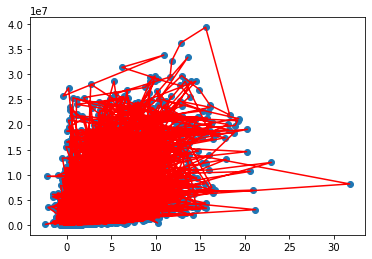

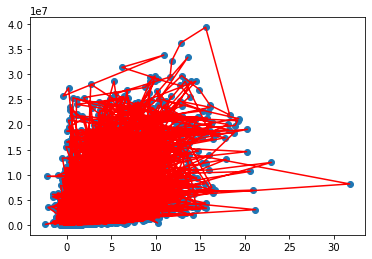

[  117093.85505414  -932083.80814421 -1618911.18140137 ...
  1223618.38228519  -704346.03333923   -88914.90099303]
8388131.959484449
[  117093.85505414  -932083.80814421 -1618911.18140137 ...
  1223618.38228519  -704346.03333923   -88914.90099303]
8388131.959484449


In [40]:
# Let's plot the predictions as a red line against the data points
plt.scatter(X_regression, y_regression)
plt.plot(X_regression, y_regression_pred, color='red')
plt.show()

# Then print the slope and the y-intercept
print(model.coef_)
print(model.intercept_)

We can see from the plotted data that the model couldn't predict a line of best fit, and we can see that our data is just a blob, and isn't a linear line. We may want to explore placing the salaries into groups/clusters and seeing if the stats are predictive of the player's salary falling into a particular range